# Trabalho No 2: 2025-1
Disciplina: Métodos numéricos para equações diferenciais parciais

## Objetivo da Comparação

Ao aplicar ambos os métodos, os polinômios obtidos devem coincidir neste caso específico. A comparação serve para:

- Verificar a equivalência dos métodos em condições ideais (grau + 1 pontos).
- Entender que para conjuntos maiores, os resultados divergem: **interpolação continua tentando passar por todos os pontos**, enquanto **mínimos quadrados suavizam o ajuste**.

---

## Forma Geral Esperada

O polinômio quadrático terá a forma: $p(x) = ax^2 + bx + c$. Os coeficientes \(a\), \(b\), e \(c\) serão determinados via cada método e comparados.

## Implementação dos Métodos

A seguir, implementamos dois métodos para encontrar o polinômio quadrático que representa os dados fornecidos:

1. **Interpolação Polinomial (Lagrange)** — Calcula um polinômio que passa exatamente por todos os pontos.
2. **Ajuste por Mínimos Quadrados (Regressão)** — Encontra um polinômio que melhor se ajusta aos dados minimizando o erro quadrático total.

Ambos os métodos serão comparados graficamente e simbolicamente.

## 1. Importação das bibliotecas

In [5]:
import numpy as np                      # Operações numéricas e vetoriais
import matplotlib.pyplot as plt        # Geração de gráficos
from sympy import symbols, simplify    # Manipulação simbólica para interpolação

## 2. Definição do sistema e explicações teóricas

In [7]:
# Dados
# Cada par (x, y) representa um ponto que o polinômio deve ajustar
x_vals = np.array([0, 3, 4])
y_vals = np.array([4, 2, 4])

### 2.1. MÉTODO 1: MÍNIMOS QUADRADOS

#### Ajuste por Mínimos Quadrados

Utilizamos a função `np.polyfit(x_vals, y_vals, 2)` para ajustar um polinômio de grau 2 (quadrático) aos dados.  
Ela retorna os coeficientes $a$, $b$, $c$ do polinômio:

$$
p(x) = ax^2 + bx + c
$$

Esse polinômio é o que **melhor se ajusta aos pontos fornecidos**, no sentido de **minimizar o erro quadrático total**.

---

#### O que é um Polinômio Quadrático?

Um polinômio quadrático é definido como um polinômio de **grau 2**, e tem a forma:

$$
p(x) = ax^2 + bx + c
$$

Onde:
- $a \ne 0$ para garantir que o grau realmente seja 2,
- $b$ e $c$ podem ser quaisquer números reais.

---

#### Problema de Otimização

A função `polyfit` resolve internamente o seguinte problema de mínimos quadrados:

$$
\min_{a, b, c} \sum_{i=0}^{n} \left( y_i - (a x_i^2 + b x_i + c) \right)^2
$$

Ou seja, encontra os coeficientes que minimizam a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

In [10]:
# Ajuste polinomial de grau 2 (mínimos quadrados)
coefs_ls = np.polyfit(x_vals, y_vals, 2)  # coefs em ordem decrescente
p_ls = np.poly1d(coefs_ls)

In [11]:
print(p_ls)

        2
0.6667 x - 2.667 x + 4


### 2.2. Método 2: Interpolação Polinomial de Lagrange

#### Interpolação Polinomial

A interpolação polinomial consiste em encontrar um polinômio que **passa exatamente por todos os pontos fornecidos**.

Dado um conjunto de $n+1$ pontos distintos:

$$
(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)
$$

Existe um único polinômio de grau $n$ que satisfaz:

$$
P(x_i) = y_i, \quad \text{para } i = 0, 1, \dots, n
$$

---

#### Forma do Polinômio Interpolador

O polinômio pode ser escrito na forma de **Lagrange**:

$$
P(x) = \sum_{j=0}^{n} y_j \cdot L_j(x)
$$

Onde cada $L_j(x)$ é o **polinômio de base de Lagrange**, definido por:

$$
L_j(x) = \prod_{\substack{0 \leq m \leq n \\\\ m \ne j}} \frac{x - x_m}{x_j - x_m}
$$

---

#### Características

- O polinômio interpolador **passa por todos os pontos exatamente**.
- Útil para funções conhecidas em pontos discretos.
- Para poucos pontos, é eficiente; para muitos pontos, pode apresentar oscilações (fenômeno de Runge).

---

#### Observação

Diferente do ajuste por mínimos quadrados, a interpolação **não minimiza o erro global**, mas sim força o polinômio a passar exatamente pelos dados.

In [14]:
def lagrange_interpolacao(x_data, y_data):
    x = symbols('x')
    n = len(x_data)
    L = 0
    for i in range(n):
        xi, yi = x_data[i], y_data[i]
        termo = yi
        for j in range(n):
            if i != j:
                xj = x_data[j]
                termo *= (x - xj) / (xi - xj)
        L += termo
    return simplify(L)

In [15]:
p_interp = lagrange_interpolacao(x_vals, y_vals)

# Resultados

O polinômio ajustado por mínimos quadrados é impresso a partir de `np.poly1d`, que mostra a expressão algébrica do polinômio no formato:

$$
p(x) = ax^2 + bx + c
$$

Além disso, a comparação gráfica com a interpolação polinomial mostra que ambos os métodos coincidem neste caso, pois temos exatamente três pontos e estamos ajustando um polinômio de grau 2.

In [18]:
# Avaliação nos mesmos pontos
x_plot = np.linspace(min(x_vals)-1, max(x_vals)+1, 100)
y_interp = [p_interp.evalf(subs={symbols('x'): val}) for val in x_plot]
y_ls = p_ls(x_plot)

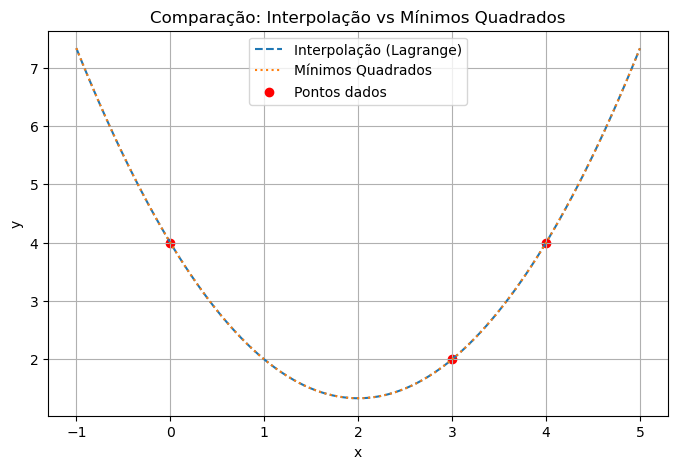

In [19]:
# Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_interp, label='Interpolação (Lagrange)', linestyle='--')
plt.plot(x_plot, y_ls, label='Mínimos Quadrados', linestyle=':')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.legend()
plt.title('Comparação: Interpolação vs Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [20]:
# Impressões
print("Polinômio por Interpolação (Lagrange):")
print(f"  {p_interp}")
print("\n--------------------------------")
print("Polinômio por Mínimos Quadrados:")
print(f"  {p_ls}")

Polinômio por Interpolação (Lagrange):
  2*x**2/3 - 8*x/3 + 4

--------------------------------
Polinômio por Mínimos Quadrados:
          2
0.6667 x - 2.667 x + 4


In [21]:
# Verifica se são praticamente iguais
if np.allclose(np.polyval(coefs_ls, x_vals), y_vals):
    print("\n✅ Ambos os métodos geram o mesmo polinômio neste caso, pois há exatamente 3 pontos e o polinômio é de grau 2.")
else:
    print("\n⚠️ Os métodos geraram polinômios diferentes (normal quando há mais de 3 pontos para grau 2).")



✅ Ambos os métodos geram o mesmo polinômio neste caso, pois há exatamente 3 pontos e o polinômio é de grau 2.


## Discussão das Diferenças e Semelhanças

### ✅ Semelhanças:

- Ambos os métodos produziram o mesmo polinômio: $$ \frac{2}{3}x^2 - \frac{8}{3}x + 4 $$
- Isso ocorre porque, com 3 pontos e um polinômio de grau 2, há exatamente uma solução única para um polinômio quadrático que passe por todos os pontos. Tanto a interpolação de Lagrange quanto os mínimos quadrados convergem para essa solução.
- Ambos passam exatamente pelos pontos $(0, 4)$, $(3, 2)$ e $(4, 4)$.

---

### ⚖️ Diferenças:

#### 🧮 Método de Cálculo:

- **Lagrange**: Usa uma fórmula direta baseada nos polinômios de base de Lagrange, garantindo que o polinômio passe pelos pontos. É um método exato e não envolve minimização de erros.

- **Mínimos Quadrados**: Resolve um sistema de equações para minimizar a soma dos quadrados dos erros. Nesse caso, como o número de pontos é igual ao número de parâmetros, o erro é zero, e o resultado coincide com o de Lagrange.

---

#### 🌍 Aplicação Geral:

- Se houvesse mais pontos (por exemplo, 4 ou mais), os métodos poderiam divergir. Lagrange forçaria o polinômio a passar por todos os pontos (aumentando o grau), enquanto mínimos quadrados ajustaria o melhor polinômio quadrático, mas não necessariamente passaria por todos os pontos.

---

#### ✍️ Escrita:

- O polinômio de Lagrange foi dado em frações exatas ($\frac{2}{3}, \frac{8}{3}$), enquanto o de mínimos quadrados foi aproximado em decimais ($0.6667$, $2.6667$), mas são matematicamente idênticos.
